Name: Kendall Haworth

Bronco ID: 011694826

Partner's Name: Ramon Moreno

Partner's Bronco ID: 009949303

In [13]:
#this cell outputs Dijkstra's and A*'s shortest path for the original terrain file loaded and the one we created
#if you get errors, make sure to recompile the other cells first. Sometimes they don't load in for some reason
import math

#load in the original terrain file
with open('terrain.txt', encoding='utf-8') as infile:
    terrain = [list(line.rstrip()) for line in infile]

for i in range(4): #print out Dijkstra's and A* for 2 different text files
    
    if (i == 2): #now load in the terrain file we created
        with open('myNewTerrain.txt', encoding='utf-8') as infile:
            terrain = [list(line.rstrip()) for line in infile]
            
    #begin at the smiley face
    for row in range(len(terrain)):
        for column in range(len(terrain[0])):
            if (terrain[row][column] == '😀'):
                startingLocation = (row, column)
                break
    
    if (i == 2): #show the unedited terrain file we created
        print("Our own terrain file, unedited:\n")
        print(pretty_print_path(startingLocation, terrain))
        print("----------------------------------------")
        print()
    
    if (i == 0 or i == 2): #Dijkstra's first
        shortestDistances, listLocations, nodesSearched = dijkstras(startingLocation, terrain)
    elif (i == 1 or i == 3): #A* next
        shortestDistances, listLocations, nodesSearched = a_star(startingLocation, terrain)
    
    #find all tree locations
    treeLocations = []
        
    for row in range(len(terrain)):
        for column in range(len(terrain[0])):
            if (terrain[row][column] == '🌲'):
                treeLocations.append((row, column))
                
    #find the location of the closest tree
    minimum = math.inf
    
    for r in treeLocations:
        if(shortestDistances[r[0]][r[1]] < minimum):
            minimum = shortestDistances[r[0]][r[1]]
            currentLocation = r
    
    #backtrace the path to closest tree
    shortestPath = []
    
    while (listLocations[currentLocation[0]][currentLocation[1]] != None):
        shortestPath.append(currentLocation)
        currentLocation = listLocations[currentLocation[0]][currentLocation[1]]
        
    shortestPath.append(startingLocation) #add on the initial position, which had no position before it
    
    #reverse the list to get the locations going forwards
    shortestPath.reverse()
        
    #the terrain is (y, x) so switch each tuple in the list
    newShortestPath = []
    
    #pretty print the paths
    for r in shortestPath:
        newShortestPath.append((r[1], r[0]))
        
    if (i == 0 or i == 2):
        print("Dijkstra's algorithm")
    elif (i == 1 or i == 3):
        print("A* algorithm")
        
    print("Nodes Searched:", nodesSearched, "\n")
    
    print(pretty_print_path(newShortestPath, terrain))
    
    if (i != 3):
        print("----------------------------------------")
        print()

Dijkstra's algorithm
Nodes Searched: 78 

😀😁😂🤣🌿🌼🌿🌼🌼🌿🌿🌿
🌿🌿🌿🌿😃🌼😅🌼🌼🌿🌿🌿
🌿🌿🌿🌿🌿😄🌼😆🌿🌿🌿🌿
🌿🌿🌿🌊🌊🌊🌊🌊😉🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😊🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😋🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😀🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😁🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😂🌊🌊🌊
🌿🌿🌿🌲🌿🌿🌿🌿🌿🤣😃🌲
----------------------------------------

A* algorithm
Nodes Searched: 41 

😀🌿🌿🌿🌿🌼🌿🌼🌼🌿🌿🌿
🌿😁🌿🌿🌿🌼😅🌼🌼🌿🌿🌿
🌿🌿😂🤣😃😄🌼😆🌿🌿🌿🌿
🌿🌿🌿🌊🌊🌊🌊🌊😉🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😊🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😋🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😀🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😁🌊🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊😂🌊🌊🌊
🌿🌿🌿🌲🌿🌿🌿🌿🌿🤣😃🌲
----------------------------------------

Our own terrain file, unedited:

🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌉🌉🌉🌉🌉🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌊🌉🌊🌿🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌊😀🌊🌼🌼🌼🌼🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌊🌊🌊🌼🌼🌼🌼🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌿🌿🌼🌼🌼🌿🌼🌊🌊
🌊🌊🌊🌊🌿🌿🌿🌿🌿🌼🌼🌼🌼🌼🌊🌊
🌊🌊🌲🌊🌿🌿🌿🌿🌿🌼🌼🌼🌼🌲🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊
----------------------------------------

Dijkstra's algorithm
Nodes Searched: 124 

🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌉🌉🌉😂🌉🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌊😁🌊🤣🌿🌿🌿🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌊😀🌊😃🌼🌼🌼🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌊🌊🌊🌼😄🌼🌼🌊🌊
🌊🌊🌿🌿🌿🌿🌿🌿🌿🌼🌼🌼😅🌼🌊🌊
🌊🌊🌊🌊🌿🌿🌿🌿🌿🌼🌼🌼😆🌼🌊🌊
🌊🌊🌲🌊🌿🌿🌿🌿🌿🌼🌼🌼🌼😉🌊🌊
🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊
----------------------------------------

A* algorithm
Nodes Searched: 17 

🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊

In [12]:
import math

def dijkstras(initial_position, terrain):
    
    #create a list of all visited locations, initialized to False
    width = len(terrain[0])
    height = len(terrain)
    
    visitedList = [[False for x in range(width)] for y in range(height)]
    
    #create a list to hold the shortest distances to each location (infinity to begin with)
    shortestDistances = [[math.inf for x in range(width)] for y in range(height)]
    shortestDistances[initial_position[0]][initial_position[1]] = 0 #initial location has 0 distance
    
    #create a list to hold the previous city taken to get to a location
    listLocations = [[None for x in range(width)] for y in range(height)]
    
    #add the initial position to the priority queue
    priorityQueue = PriorityQueue()
    priorityQueue.put(initial_position, 0) #initial location has 0 distance
    nodesSearched = 0 #keep track of how many nodes were searched
    
    #now check all nodes until the location has been found or the queue is empty
    while (priorityQueue.empty() != True):
        distance, position = priorityQueue.get() #gets both the current cost and the position (position is a tuple)
        
        #if you've already visited this position, ignore it
        if (visitedList[position[0]][position[1]] == True):
            continue
        
        #get the position's neighbors and add them to the queue if they are not already visited
        positionNeighbors = find_neighbors(position, terrain)
        
        for r in positionNeighbors:
            if (visitedList[r[0][0]][r[0][1]] != True): #it has not been visited
                priorityQueue.put(r[0], r[1] + distance)
        
        #perform Dijkstra's Algorithm
        #search each of position's neighbors for a shorter path
        #if the combined distance is less than the previous distance, it becomes the new shortest distance
        #set the new shortest distance and add it the priority queue
        
        for r in positionNeighbors:
            if ((distance + r[1]) < shortestDistances[r[0][0]][r[0][1]]):
                shortestDistances[r[0][0]][r[0][1]] = distance + r[1] #update the new shortest distance
                listLocations[r[0][0]][r[0][1]] = position #update the position this node came from
                priorityQueue.put(r[0], distance + r[1])
                
        #mark the city as visited
        visitedList[position[0]][position[1]] = True
        
        nodesSearched += 1 #increment the number of nodes searched
        
        #exit once the goal has been located
        if (is_goal(position, terrain)):
            break
    
    #we're returning the list of the shortestDistances to all nodes searched, the path taken for
    #the shortest distance, and the number of nodes searched
    return shortestDistances, listLocations, nodesSearched

In [11]:
#A* only differs from Dijkstra's Algorithm by adding in the heuristic cost to
#the ordering in the priority queue, keeping track of the actual cost separately
def a_star(initial_position, terrain):
    
    #create a list of all visited locations, initialized to False
    width = len(terrain[0])
    height = len(terrain)
    
    visitedList = [[False for x in range(width)] for y in range(height)]
    
    #create a list to hold the shorest distances to each location (infinity to begin with)
    shortestDistances = [[math.inf for x in range(width)] for y in range(height)]
    shortestDistances[initial_position[0]][initial_position[1]] = 0 #initial location has 0 distance
    
    #create a list to hold the previous city taken to get to a location
    listLocations = [[None for x in range(width)] for y in range(height)]
    
    #add the initial position to the priority queue.
    #the heuristic cost is the order, while the actual cost is stored as a tuple with the initial position
    priorityQueue = PriorityQueue()
    priorityQueue.put((initial_position, 0), get_heuristic(initial_position, terrain)) #initial location has 0 distance
    nodesSearched = 0 #keep track of all nodes searched
    
    #now check all nodes until the location has been found or the queue is empty
    while (priorityQueue.empty() != True):
        
        #gets position, actual cost, and heuristic cost (both of these are tuples)
        heuristicCost, positionAndCost = priorityQueue.get()
        
        position = positionAndCost[0]
        actualCost = positionAndCost[1]
        
        #if you've already visited this position, ignore it
        if (visitedList[position[0]][position[1]] == True):
            continue
        
        #get the position's neighbors and add them to the queue if they are not already visited
        positionNeighbors = find_neighbors(position, terrain)
        
        for r in positionNeighbors:
            if (visitedList[r[0][0]][r[0][1]] != True): #it has not been visited
                
                #the position's heuristic cost is added here as well for ordering
                priorityQueue.put((r[0], actualCost + r[1]), actualCost + r[1] + get_heuristic(r[0], terrain))
        
        #perform Dijkstra's Algorithm
        #search each of position's neighbors for a shorter path
        #if the combined distance is less than the previous distance, it becomes the new shortest distance
        #set the new shortest distance and add it the priority queue with the heuristic cost
        
        for r in positionNeighbors:
            if ((actualCost + r[1]) < shortestDistances[r[0][0]][r[0][1]]):
                shortestDistances[r[0][0]][r[0][1]] = actualCost + r[1] #update the new shortest distance
                listLocations[r[0][0]][r[0][1]] = position #update the position this node came from
                priorityQueue.put((r[0], actualCost + r[1]), actualCost + r[1] + get_heuristic(r[0], terrain))
              
        #mark the city as visited
        visitedList[position[0]][position[1]] = True
        
        nodesSearched += 1 #increment the number of nodes searched
        
        #exit once the goal has been located
        if (is_goal(position, terrain)):
            break
    
    #we're returning the list of the shortestDistances to all nodes searched, the path taken for
    #the shortest distance, and the number of nodes searched
    return shortestDistances, listLocations, nodesSearched

In [10]:
#current_position is a tuple of 2 elements, the row and column of the current position
#terrain is the 2D list
#returns a list[] of all of the neighbors (tuples of ((x, y), cost))

def find_neighbors(current_position, terrain):
    neighbors = []
    
    for row in range(3): #0, 1, 2
        for column in range(3):
            
            #ignore elemnets out of range
            if (((current_position[0]-1+row) < 0) or ((current_position[0]-1+row) > len(terrain)-1)
            or ((current_position[1]-1+column) < 0) or ((current_position[1]-1+column) > len(terrain[0])-1)):
                continue
                
            else:
                pos1 = current_position[0]-1+row
                pos2 = current_position[1]-1+column
                
                cost = 0 #if the node is a 😀, 0 will be returned as the cost since it is the starting position
                
                if (terrain[pos1][pos2] == '🌿'):
                    cost = 1
                elif (terrain[pos1][pos2] == '🌉'):
                    cost = 1
                elif (terrain[pos1][pos2] == '🌲'):
                    cost = 1
                elif (terrain[pos1][pos2] == '🌼'):
                    cost = 2
                elif (terrain[pos1][pos2] == '🌊'):
                    cost = 5
                    
                neighbors.append(((pos1, pos2), cost))
           
    return neighbors

In [9]:
#returns the minimum distance to the closest tree
#position is a tuple of 2 elements

import math

def get_heuristic(position, terrain):
    
    #find all trees and save their locations in a list
    
    treeLocations = []
    
    for row in range(len(terrain)):
        for column in range(len(terrain[0])):
            if (terrain[row][column] == '🌲'):
                treeLocations.append((row, column))
    
    #find the distance to each tree and save them in another list
    
    distances = []
    
    for row in treeLocations:
        number = abs(position[1]-row[1]) + abs(position[0]-row[0])
        distances.append(number)
    
    #return the shortest distance to the nearest tree
    #for some reason the built in "min" function gives me an error,
    #so I found the min explicitly here
    
    minimum = math.inf

    for r in distances:
        if (r < minimum):
            minimum = r
    
    return minimum #return the shortest distance to the nearest tree

In [8]:
#position is a tuple
#returns true if the goal has been reached, false otherwise
def is_goal(position, terrain):
    
    if (terrain[position[0]][position[1]] == '🌲'):
        return True
    
    return False

In [7]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
        self.visited = 0
    
    #returns true if the queue is empty, false if it is not
    def empty(self):
        return len(self.elements) == 0
    
    #adds an item to the priorityQueue
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, self.visited, item))
        self.visited += 1
        
    #gets the first element from the priorityQueue
    def get(self):
        item = heapq.heappop(self.elements)
        return item[0], item[2] #We changed this here since we wanted both the current cost and the location back from the queue
    
#path is a list of (x,y) tuples
def pretty_print_path(path, terrain):
        
    emojis = ['😀','😁','😂','🤣','😃','😄','😅','😆','😉','😊','😋']
    
    path2len = {location:distance for distance, location in enumerate(path)}
    output = []
    for yy,row in enumerate(terrain):
        row_str = ''
        for xx, cur in enumerate(row):
            if (xx,yy) in path2len:
                row_str += emojis[path2len[(xx,yy)] % len(emojis)]
            else:
                row_str += cur
        output.append(row_str)
    return '\n'.join(output)

In [6]:
#this cell generates random terrain!
#each time this cell is run, a new terrain file is generated with 1 😀 and 1 🌲 (and the old terrain file is overwritten)

#note - change the terrain file to "TerrainGenerator.txt" in the cell at the top of this notebook to use this terrain file.

import random

terrainFile = open('TerrainGenerator.txt', 'w', encoding='utf-8')

rowSmiley = random.randint(0, 14)
columnSmiley = random.randint(0, 14)

rowTree = random.randint(0, 14)
columnTree = random.randint(0, 14)

for r in range(15):
    for c in range(15):
        
        if (r == rowSmiley and c == columnSmiley):
            terrainFile.write("😀")
            continue
            
        if (r == rowTree and c == columnTree):
            terrainFile.write("🌲")
            continue
        
        
        number = random.randint(1, 4) #generates 1, 2, 3, or 4
        
        if (number == 1):
            terrainFile.write("🌿")
        elif (number == 2):
            terrainFile.write("🌼")
        elif (number == 3):
            terrainFile.write("🌉")
        elif (number == 4):
            terrainFile.write("🌊")
            
    if (r != 14):
        terrainFile.write("\n")

terrainFile.close()

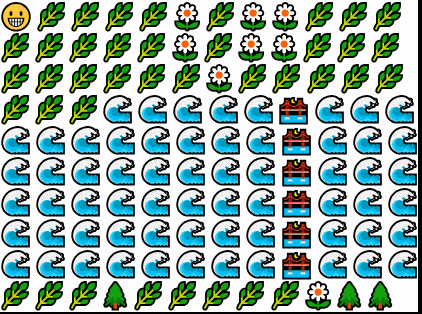

In [5]:
#I made a gif to show off the shortest path
from IPython.display import Image

with open('PythonShortestPath.gif','rb') as f:
    display(Image(data=f.read(), format='png'))